In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.ticker as ticker 
from matplotlib import cm 
import matplotlib as mpl 

### **Function SEMI-F47** 

In [2]:
def plot_semi_f47(duration, voltage): 
    sns.set_theme(style='ticks', palette='muted')
    fig, ax = plt.subplots(figsize = (10, 5)) 
    
    plt.text(400, 40, 
             "Misoperation Region", 
             fontsize=15, 
             fontweight='bold') 
    plt.text(400, 40,
             "Unffected Region",
             fontsize=15, 
             fontweight='bold')
    # Plot data point 
    scatter_fn = ax.scatter(duration, voltage, 
                            c=voltage, 
                            label='% Vnominal',
                            alpha=0.85, 
                            edgecolors='black', 
                            marker='o',
                            cmap='plasma_r' 
                            )
    # SEMI F47 Standard Segment 
    x1, y1 = [50, 200], [50, 50] 
    x2, y2 = [200, 500], [70, 70] 
    x3, y3 = [500, 1000], [80, 80] 
    
    ax.plot(x1, y1, c='#0000CD', linewidth=2)
    ax.plot(x2, y2, c='#0000CD', linewidth=2)
    ax.plot(x3, y3, c='#0000CD', linewidth=2)  
    
    # vertical line 
    ax.axvline(x=200, ymin=0.5, ymax=0.7, c='#0000CD', linewidth=2)
    ax.axvline(x=500, ymin=0.7, ymax=0.8, c='#0000CD', linewidth=2) 
    
    
    ax.set_xlabel('Duration (ms)') 
    ax.set_ylabel('% Vnominal')
    ax.set_title('SEMI F47-0706 Voltage Sag Analysis', fontweight='bold') 
    
    ax.set_xlim(0, 1000) 
    ax.set_ylim(0, 100)
    ax.set_xticks(range(0, 1001, 100)) 
    ax.set_yticks(range(0, 101, 10)) 
    
    ax.grid(True, c='gray', alpha=0.58) 
    
    fig.colorbar(scatter_fn, label='Vnominal %', 
                 orientation='vertical', 
                 pad=0.2) 
    
    plt.figtext(0.95, -0.1, 
                "\n Prepared by Sarawin Buakaew, 2025\n"
                "Data From Protection Relay REF630 ABB"
                "Process by Python Programming", 
                ha='right', 
                va='bottom',
                fontsize=10,
                c='gray') 
    
    plt.tight_layout()
    plt.savefig('semi_f47.png', dpi=300, bbox_inches='tight') 
    ax.legend()
    plt.show() 

### **Process Analyzed** 

In [3]:
file_path = 'results/fault_analysis_results.csv'
df = pd.read_csv(file_path, encoding='utf-8') 
df

,Event Date,Confirmed Faults,Fault Strat time (s),Fault End time (s),Fault Duration (ms),Voltage Sag,Voltage p.u.
0,11-01-2025,Phase C,0.47,0.73,252.0,36.69,0.63


In [4]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
df['Event Date'] = pd.to_datetime(df['Event Date'], format='%d-%m-%Y') 
df['Voltage sag'] = pd.to_numeric(df['Voltage Sag'], errors='coerce')
df['Voltage p.u.'] = pd.to_numeric(df['Voltage p.u.'], errors='coerce')
df['Affected Phase'] = df['Confirmed Faults']
df['Fault Duration'] = pd.to_numeric(df['Fault Duration (ms)'], errors='coerce')
df

,Event Date,Confirmed Faults,Fault Strat time (s),Fault End time (s),Fault Duration (ms),Voltage Sag,Voltage p.u.,Voltage sag,Affected Phase,Fault Duration
0,2025-01-11,Phase C,0.47,0.73,252.0,36.69,0.63,36.69,Phase C,252.0


In [5]:
df['Affected Phase'] = df['Affected Phase'].str.strip()  # Remove leading/trailing spaces
df['Affected Phase'] = df['Affected Phase'].str.title()  # Capitalize first letter of each word

df_sag = df[df['Voltage sag']>10].copy() 
df_sag['year'] = df_sag['Event Date'].dt.year 

grouped = df_sag.groupby(['year', 'Affected Phase'])['Voltage sag'].agg(['count',
                                                                        'mean',
                                                                        'min',
                                                                        'max']).reset_index()

phase_counts = df['Affected Phase'].value_counts() 
phase_counts

Affected Phase
Phase C    1
Name: count, dtype: int64

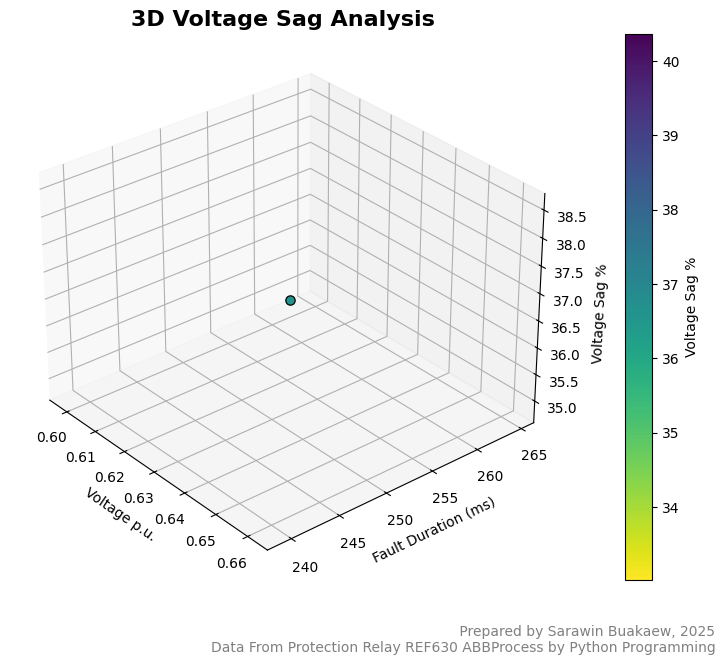

In [6]:
voltaes_sag = df['Voltage sag'] 
voltage_pu = df['Voltage p.u.'] 
fault_rms = df['Fault Duration'] 

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d') 

scatter = ax.scatter(voltage_pu, fault_rms, voltaes_sag,
                     c=voltaes_sag,
                     cmap='viridis_r',
                     marker='o',
                     alpha=0.99,
                     edgecolors='black',
                     linewidth=0.9,
                     s=45) 

fig.colorbar(scatter,
             label='Voltage Sag %', 
             orientation='vertical',
             pad=0.09)

ax.set_title('3D Voltage Sag Analysis', fontsize=16 ,fontweight='bold')
ax.set_xlabel('Voltage p.u.')
ax.set_ylabel('Fault Duration (ms)')
ax.set_zlabel('Voltage Sag %')

min_idx = df['Voltage sag'].idxmin() 

ax.view_init(elev=30, azim=-40, roll=0) 

plt.figtext(0.95, -0.1,
            "\n Prepared by Sarawin Buakaew, 2025\n"
            "Data From Protection Relay REF630 ABB"
            "Process by Python Programming", 
            ha='right', 
            va='bottom',
            fontsize=10,
            c='gray')

plt.tight_layout()